In [1]:
import pandas as pd

In [2]:
import os
from PIL import Image

# Directory containing your images
image_dir = './documents'  # Current directory

# List all files in the directory
image_files = os.listdir(image_dir)

# Open each image file
images = [Image.open(os.path.join(image_dir, file)) for file in image_files if file.endswith(('.png', '.jpg', '.jpeg'))]

show first image

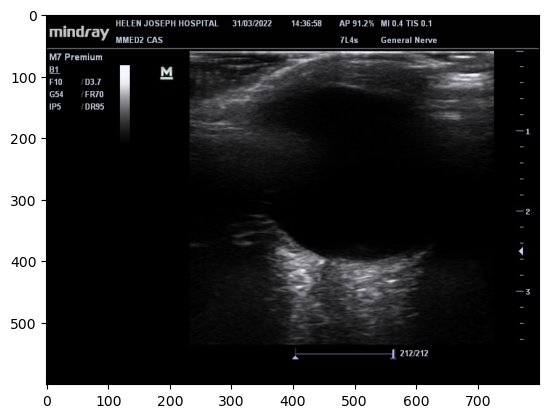

In [3]:
import matplotlib.pyplot as plt

# Display the first image
plt.imshow(images[0])
plt.show()

Mapping ONSD measurements to images to create labels

In [4]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = './Meta_pic.xlsx'
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['label'] = df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Now let's proceed to match and rename the images
documents_dir = './documents'  # Assuming this is your correct directory path

# Iterate over the DataFrame to match, rename images and create an ONSD mapping dictionary
image_onsd_mapping = {}
for index, row in df.iterrows():
    image_name_to_look_for = row['label']
    onsd_value = row['onsd']
    image_path = os.path.join(documents_dir, image_name_to_look_for)

    if os.path.exists(image_path):
        image_onsd_mapping[image_name_to_look_for] = onsd_value
    else:
        print(f"No matching file found for label: {image_name_to_look_for}")

# Display the ONSD mapping
for image_name, onsd_value in image_onsd_mapping.items():
    print(f"{image_name}: {onsd_value}")


MMED-002_image_data_1_raw_image.jpg: 5
MMED-002_image_data_2_raw_image.jpg: 5
MMED-003_image_data_1_raw_image.jpg: 5
MMED-004_image_data_1_raw_image.jpg: 5
MMED-004_image_data_2_raw_image.jpg: 5
MMED-005_image_data_1_raw_image.jpg: 5
MMED-005_image_data_2_raw_image.jpg: 4
MMED-006_image_data_1_raw_image.jpg: 5
MMED-006_image_data_2_raw_image.jpg: 5
MMED-007_image_data_1_raw_image.jpg: 4
MMED-007_image_data_2_raw_image.jpg: 5
MMED-008_image_data_1_raw_image.jpg: 5
MMED-008_image_data_2_raw_image.jpg: 5
MMED-009_image_data_1_raw_image.jpg: 4
MMED-010_image_data_1_raw_image.jpg: 5
MMED-010_image_data_2_raw_image.jpg: 6
MMED-011_image_data_1_raw_image.jpg: 4
MMED-011_image_data_2_raw_image.jpg: 4
MMED-012_image_data_1_raw_image.jpg: 4
MMED-012_image_data_2_raw_image.jpg: 4
MMED-013_image_data_1_raw_image.jpg: 4
MMED-013_image_data_2_raw_image.jpg: 5
MMED-014_image_data_1_raw_image.jpg: 5
MMED-014_image_data_2_raw_image.jpg: 5
MMED-015_image_data_1_raw_image.jpg: 5
MMED-015_image_data_2_raw

Create a csv file in this directory which have the image: measurement mapping

In [5]:
import pandas as pd

# Convert your dictionary to a DataFrame
df_onsd = pd.DataFrame(list(image_onsd_mapping.items()), columns=['filename', 'label'])

# Save this DataFrame to a CSV file
df_onsd.to_csv('image_labels.csv', index=False)


Experiment with Cropping of images

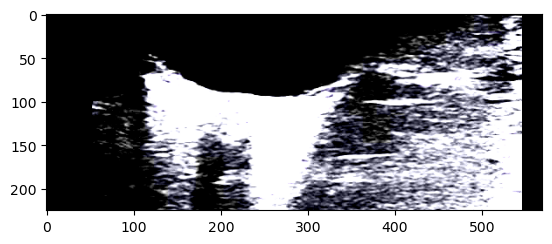

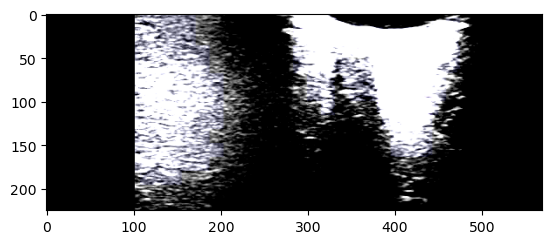

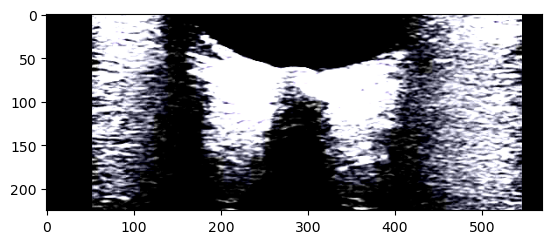

In [6]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Function to calculate crop coordinates and enhance contrast
def process_image(image_path, contrast_factor=1.5):
    with Image.open(image_path) as img:
        # Crop the image
        crop_box = (180, 300, 750, 525)
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(contrast_factor)
        return enhanced_img

# List your image paths here
image_paths = [
    'documents/MMED-009_image_data_1_raw_image.jpg',
    'documents/MMED-012_image_data_2_raw_image.jpg',
    'documents/MMED-017_image_data_2_raw_image.jpg'
]

# Adjust the contrast factor as needed
contrast_factor = 10

# This will iterate over the first three image paths, process them, and display them inline
for path in image_paths[:3]:
    processed_image = process_image(path, contrast_factor)
    plt.figure()
    plt.imshow(processed_image)
    plt.show()



Process Images: Crop and Enhance Contrast

In [7]:
from PIL import Image, ImageEnhance
import os

# Define the coordinates of the crop box (left, upper, right, lower)
crop_box = (180, 300, 750, 525)

# Path to the directory containing the images
image_dir = './documents'  # Replace with the path to your image directory

# New directory to store processed images
processed_dir = os.path.join(image_dir, 'processed_images')
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)

# List of all image filenames
image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_filename in image_filenames:
    image_path = os.path.join(image_dir, image_filename)
    with Image.open(image_path) as img:
        # Crop the image
        cropped_img = img.crop(crop_box)
        # Enhance the contrast
        enhancer = ImageEnhance.Contrast(cropped_img)
        enhanced_img = enhancer.enhance(10)  # Contrast factor of 10
        # Save the processed image in the 'processed_images' directory
        enhanced_img.save(os.path.join(processed_dir, f"enhanced_{image_filename}"))

print(f"Processed images are saved in {processed_dir}")




Processed images are saved in ./documents\processed_images


Creating a CSV with measurements linked to processed images in the same file

In [8]:
import pandas as pd
import os

# Load the DataFrame from the Excel file
excel_file = './Meta_pic.xlsx'
df = pd.read_excel(excel_file)

# Convert necessary columns to strings and create a label column following the naming convention
df['processed_label'] = 'enhanced_' + df['record_id'].astype(str) + '_image_data_' + df['redcap_repeat_instance'].astype(str) + '_raw_image.jpg'

# Define the directory containing your processed images
processed_images_dir = './documents/processed_images'  

# Create a new DataFrame to store image names and corresponding ONSD measurements
image_measurements = []

# Iterate over the DataFrame to find matches in the processed_images directory
for index, row in df.iterrows():
    processed_image_name = row['processed_label']
    onsd_value = row['onsd']
    image_path = os.path.join(processed_images_dir, processed_image_name)

    if os.path.exists(image_path):
        # If a matching processed image is found, append the details to the list
        image_measurements.append({'image_filename': processed_image_name, 'onsd_measurement': onsd_value})
    else:
        print(f"No matching file found for label: {processed_image_name}")

# Convert the list to a DataFrame
image_measurements_df = pd.DataFrame(image_measurements)

# Save this DataFrame to a CSV file in the processed_images directory
csv_file_path = os.path.join(processed_images_dir, 'image_measurements.csv')
image_measurements_df.to_csv(csv_file_path, index=False)

print(f"CSV file saved to {csv_file_path}")


CSV file saved to ./documents/processed_images\image_measurements.csv


Importing Libaries for simple CNN attempt for regression task of measuring ONSD

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image


Load and split processed image data

In [10]:
import pandas as pd
import os
from PIL import Image
import numpy as np

# Correct base directory for your processed images
base_dir = r"C:\Users\cparker\OneDrive - WRHI\Andrew\FilesReport_UJReport_2024-03-14_1413 (1)\FilesReport_UJReport_2024-03-14_1413\documents\processed_images"

# Assuming you have 'image_measurements.csv' in the same directory as your processed images
csv_file = os.path.join(base_dir, 'image_measurements.csv')
df = pd.read_csv(csv_file)

# Function to load images based on the corrected path
def load_images(df, base_dir):
    images = []
    for _, row in df.iterrows():
        image_path = os.path.join(base_dir, row['image_filename'])
        try:
            with Image.open(image_path) as img:
                img = img.resize((128, 128))  # Resize for uniformity
                img_array = np.array(img)
                images.append(img_array)
        except FileNotFoundError:
            print(f"File not found: {image_path}")
    return np.array(images)

images = load_images(df, base_dir)
onsd_measurements = df['onsd_measurement'].values

# Normalize images
images = images / 255.0

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(images, onsd_measurements, test_size=0.2, random_state=42)


Simple CNN model architecture

In [11]:
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1)  # Single output node for regression
    ])
    return model


In [12]:
model = build_model()
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])  # MSE is a common loss for regression


c:\Users\cparker\AppData\Local\anaconda3\envs\new_env_name\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))


Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 700ms/step - loss: 10.2685 - mae: 2.6514 - val_loss: 1.0902 - val_mae: 0.7740
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - loss: 1.5983 - mae: 1.0160 - val_loss: 3.0593 - val_mae: 1.5087
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - loss: 3.3177 - mae: 1.4796 - val_loss: 1.0772 - val_mae: 0.8415
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - loss: 1.1978 - mae: 0.8348 - val_loss: 0.5589 - val_mae: 0.6223
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - loss: 1.2688 - mae: 0.9197 - val_loss: 0.4891 - val_mae: 0.5758
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 433ms/step - loss: 0.8485 - mae: 0.7461 - val_loss: 0.5790 - val_mae: 0.6485
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 490ms/step - loss: 0.8912 - mae: 0.7517 - val_loss: 0.8531 - val_mae: 0.7163
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - loss: 1.0595 - mae: 0.8709 - val_loss: 1.0917 - val_mae: 0.8570
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 452ms/step - loss: 1.1499 - mae

In [14]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4212 - mae: 0.5765
Test MAE: 0.5795376300811768


In [15]:
# Make predictions
predictions = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step


In [16]:
for i in range(len(predictions)):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test[i]}")


Predicted: 4.790591716766357, Actual: 6
Predicted: 4.766494274139404, Actual: 4
Predicted: 4.672884464263916, Actual: 4
Predicted: 4.6250224113464355, Actual: 5
Predicted: 4.290407657623291, Actual: 4
Predicted: 4.612216472625732, Actual: 4
Predicted: 4.756374359130859, Actual: 4
Predicted: 4.59665584564209, Actual: 5
Predicted: 4.894626140594482, Actual: 4
Predicted: 4.103639602661133, Actual: 5
Predicted: 4.136488437652588, Actual: 5
Predicted: 4.576536178588867, Actual: 5
Predicted: 4.64528226852417, Actual: 5
Predicted: 4.817178726196289, Actual: 5
Predicted: 4.287220001220703, Actual: 4
Predicted: 4.421435832977295, Actual: 5
Predicted: 4.92671012878418, Actual: 4
Predicted: 4.417814254760742, Actual: 5
Predicted: 4.75834321975708, Actual: 5
Predicted: 4.495697021484375, Actual: 5
Predicted: 4.859890460968018, Actual: 5
Predicted: 4.418991565704346, Actual: 5
Predicted: 4.48314905166626, Actual: 5
Predicted: 4.695626735687256, Actual: 4
Predicted: 4.7008185386657715, Actual: 5
Pre

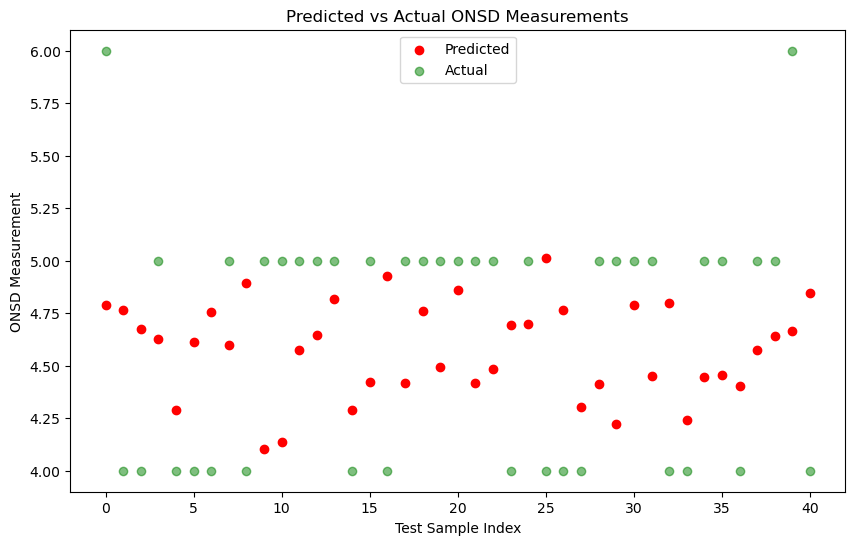

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), predictions, color='r', label='Predicted')
plt.scatter(range(len(y_test)), y_test, color='g', alpha=0.5, label='Actual')
plt.title('Predicted vs Actual ONSD Measurements')
plt.xlabel('Test Sample Index')
plt.ylabel('ONSD Measurement')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.5795376358962641
Root Mean Square Error (RMSE): 0.642118339363987


[[6.         4.79059172]
 [4.         4.76649427]
 [4.         4.67288446]
 [5.         4.62502241]
 [4.         4.29040766]
 [4.         4.61221647]
 [4.         4.75637436]
 [5.         4.59665585]
 [4.         4.89462614]
 [5.         4.1036396 ]]


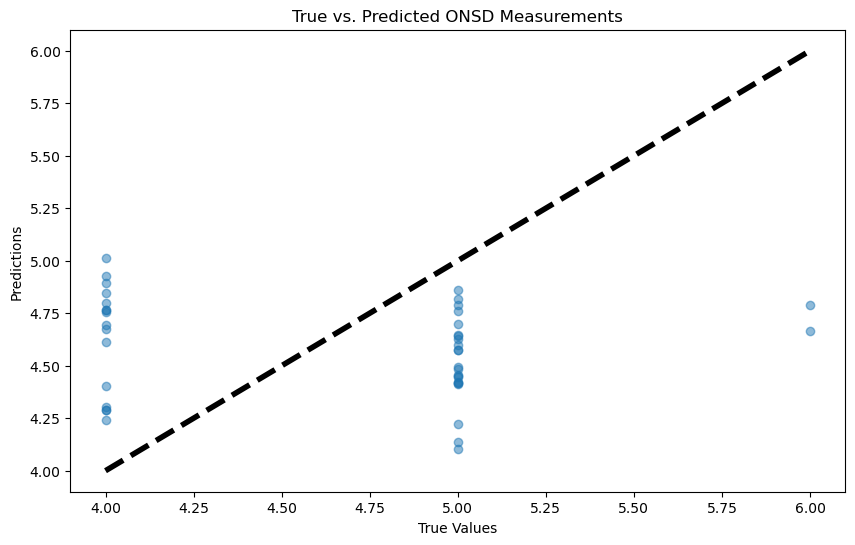

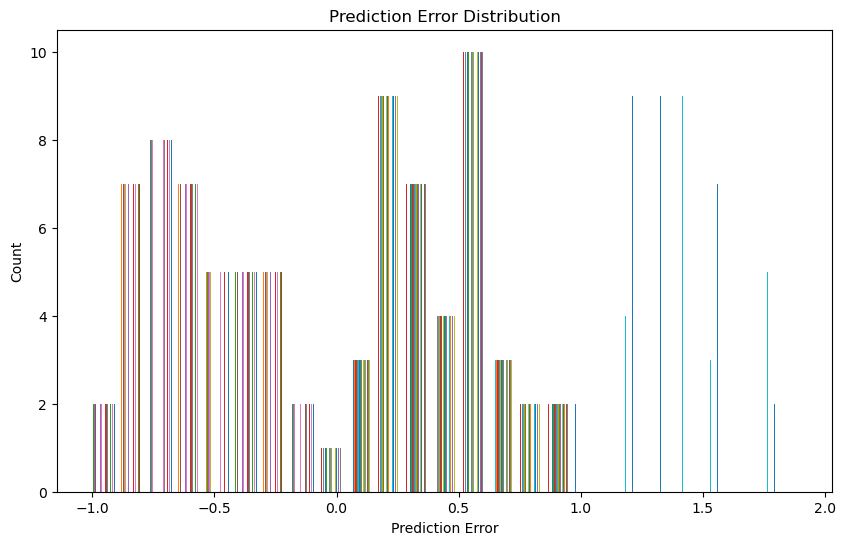

In [19]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is a numpy array of your model's predicted ONSD measurements
# and 'y_test' is the true ONSD measurements

# Compare predictions with actual values
comparison = np.column_stack((y_test, predictions))

# Print the first few comparisons to check
print(comparison[:10])

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted ONSD Measurements')
plt.show()

# Plotting the error distribution
errors = y_test - predictions
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


Trying a different architecture to see if it improves performance

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def build_enhanced_model(input_shape=(128, 128, 3)):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Output layer for regression

    return model


Building what I hope to be an enhanced model 

In [21]:
model = build_enhanced_model()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Now you would train your model, perhaps with more epochs or different batch sizes
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))


c:\Users\cparker\AppData\Local\anaconda3\envs\new_env_name\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - loss: 26.5484 - mae: 4.7447 - val_loss: 18.0190 - val_mae: 4.2048
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 999ms/step - loss: 23.4575 - mae: 4.4634 - val_loss: 15.9332 - val_mae: 3.9329
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 991ms/step - loss: 23.0203 - mae: 4.5397 - val_loss: 12.0328 - val_mae: 3.3323
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 21.1430 - mae: 4.3854 - val_loss: 3.5855 - val_mae: 1.6562
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 19.2843 - mae: 4.1145 - val_loss: 1.1478 - val_mae: 0.9796
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 20.3755 - mae: 4.2406 - val_loss: 13.6357 - val_mae: 3.6719
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 18.8356 - mae: 4.1602 - val_loss: 38.8936 - val_mae: 6.2527
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 17.9681 - mae: 4.0491 - val_loss: 51.3048 - val_mae: 7.1837
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 18.0824 - mae: 4.02

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 618ms/step
Mean Absolute Error (MAE): 42.5698483862528
Mean Squared Error (MSE): 2019.196509251059
Root Mean Squared Error (RMSE): 44.93547050216632


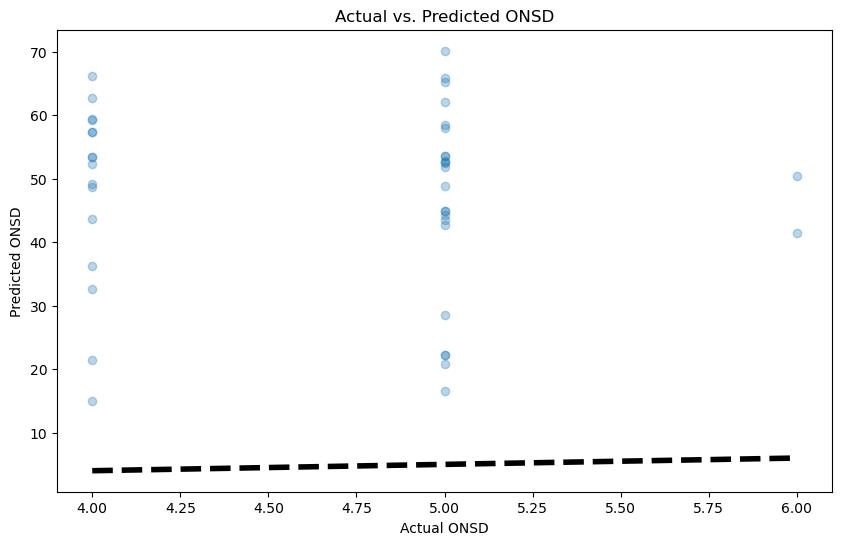

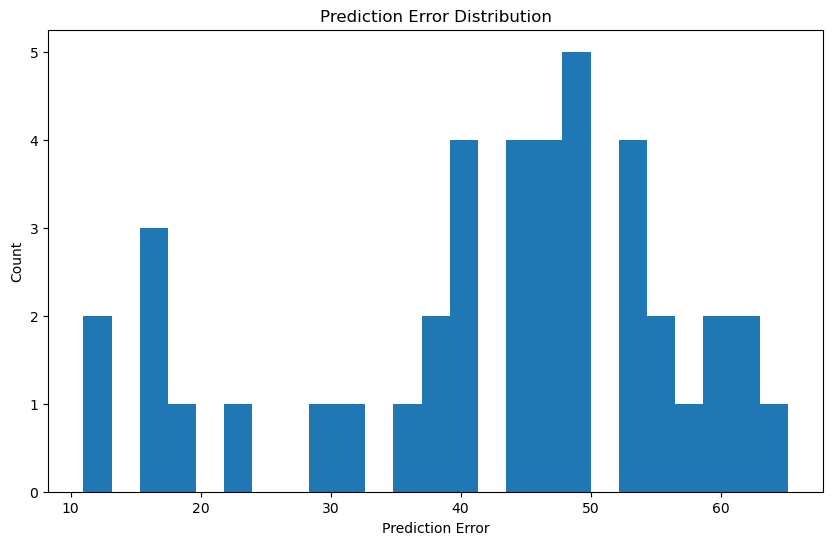

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X_test' and 'y_test' are your test datasets

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE is just the square root of MSE

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual ONSD')
plt.ylabel('Predicted ONSD')
plt.title('Actual vs. Predicted ONSD')
plt.show()

# Plotting the error distribution
errors = predictions.flatten() - y_test
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Prediction Error Distribution')
plt.show()


In [23]:
# Assuming 'predictions' is a numpy array with the predicted ONSD values
# And 'y_test' is the actual ONSD measurements from the test set

# Convert predictions to a 1D array if it's not already
predictions = predictions.flatten()

# Create a DataFrame for a cleaner display
comparison_df = pd.DataFrame({'Actual ONSD': y_test, 'Predicted ONSD': predictions})

# Add a column for absolute error
comparison_df['Absolute Error'] = np.abs(comparison_df['Actual ONSD'] - comparison_df['Predicted ONSD'])

# Display several examples
print(comparison_df.head(10))


   Actual ONSD  Predicted ONSD  Absolute Error
0            6       41.437054       35.437054
1            4       49.136532       45.136532
2            4       52.384121       48.384121
3            5       52.602470       47.602470
4            4       62.729881       58.729881
5            4       57.327991       53.327991
6            4       57.318043       53.318043
7            5       62.131046       57.131046
8            4       66.151176       62.151176
9            5       22.182970       17.182970


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

# Compile model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# Add early stopping to halt training when validation loss increases
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with early stopping
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=50, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 2.7525 - mae: 1.3412 - val_loss: 2860.1436 - val_mae: 51.3382
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 972ms/step - loss: 2.8294 - mae: 1.2415 - val_loss: 3117.5459 - val_mae: 53.6503
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 940ms/step - loss: 2.9678 - mae: 1.3388 - val_loss: 2925.5049 - val_mae: 51.8559
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 969ms/step - loss: 2.5080 - mae: 1.2250 - val_loss: 2697.7397 - val_mae: 49.6060
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 964ms/step - loss: 2.2156 - mae: 1.1820 - val_loss: 2624.2280 - val_mae: 48.8072
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 1.9444 - mae: 1.0831 - val_loss: 2456.4160 - val_mae: 47.0236
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 2.9098 - mae: 1.3030 - val_loss: 2458.8926 - val_mae: 46.9453
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 924ms/step - loss: 1.8619 - mae: 1.0019 - val_loss: 2504.8081 - val_mae: 47.3095
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step -

1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000244A2E14360> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 649ms/step
Mean Absolute Error (MAE): 47.02355354588206
Mean Squared Error (MSE): 2494.1991374017484
Root Mean Squared Error (RMSE): 49.94195768491408


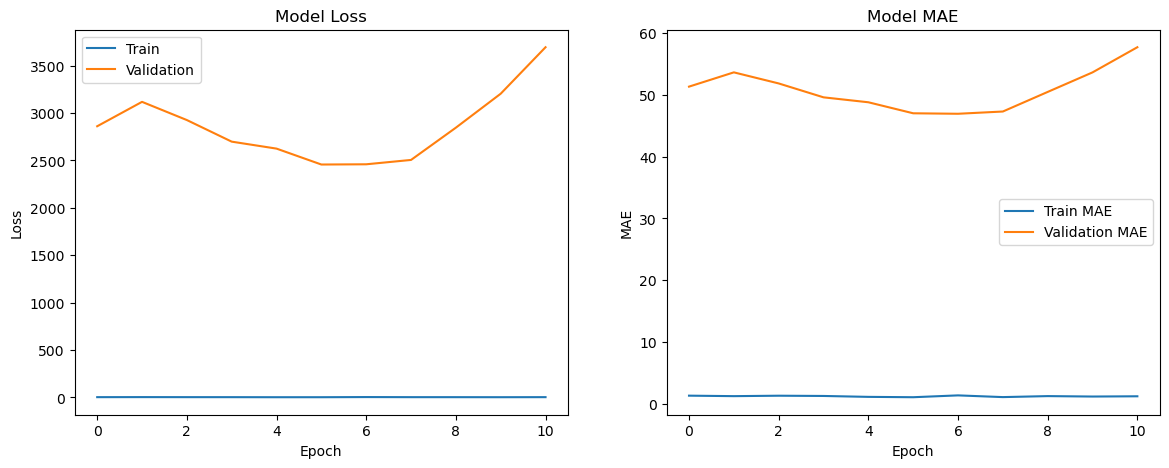

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the training history
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()


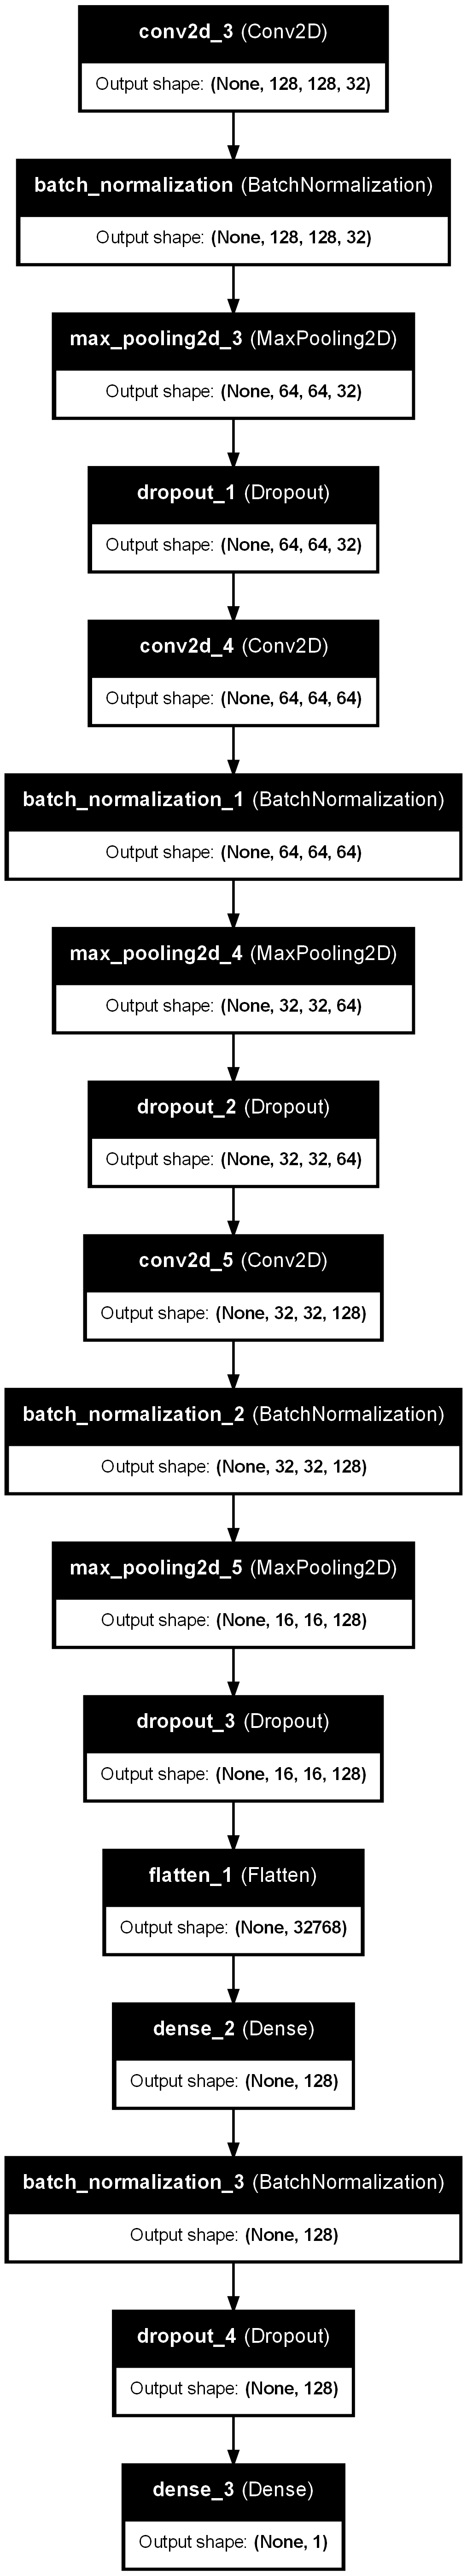

In [26]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your CNN model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
